# Perceived LGBT/Gender in Police Stop Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
### Alan's Assignment Function
import Assignment as a
df = pd.read_csv("ripa_stops_datasd.csv", low_memory=False)

## Alan's Plotting Function

In [2]:
def PlotResults(X,r,algos=["K - Means","Mixture of Gaussians","Birch"],xaxis="xaxis",yaxis="yaxis",fontsize='13'):
    '''
    Plots cluster results
        Parameters:
            X[2xN Matrix]: 2xN Matrix of Datapoints to be plotted
            r[?xN Matrix]: NumClusteringAlgorithmsxN Matrix of Datapoint Assignments from the Clustering Algorithms.
            algos[? indexed array of strings]: Titles for each of the plots based on the clustering algorithms presented.
            xaxis[string]: Label for the x axis
            yaxis[string]: Label for the x axis
        Returns:
            Plotted results of clustering algorithms in 2x[NumclusteringAlgorithms/2] subplot figure with different colors for each cluster
    '''
    
    col = 3
    rows = int(np.ceil(len(r)/col))
    
    K = len(np.unique(r[0]))
    
    fig, axs = plt.subplots(rows, col, figsize=(6*col,5*rows), sharex=True, sharey=True)

    
    for i in range(len(axs)):
        axs[i].set_title(algos[i], fontsize=fontsize)
    
    COLORS = ['r','g','b','m','c','y','k']
    
    for i in range(len(r)):
        colors = None
        colors = np.where(r[i]==0,COLORS[0],'-')
        for k in range(K-1):
            colors[r[i]==k+1] = COLORS[k+1]
        if(rows>1):
            axs[int(i/col),i%col].scatter(X[0], X[1], c=colors)
        else:
            axs[i].scatter(X[0], X[1], c=colors)
    
    # Create common X and Y axis
    fig.add_subplot(111, frame_on=False)
    plt.tick_params(labelcolor="none", bottom=False, left=False)

    plt.xlabel(xaxis, fontsize=fontsize)
    plt.ylabel(yaxis, fontsize=fontsize)

## Individual Data Pre-Processing

In [3]:
df.head()

,stop_id,ori,agency,exp_years,date_stop,time_stop,stopduration,stop_in_response_to_cfs,officer_assignment_key,assignment,...,beat_name,pid,isstudent,perceived_limited_english,perceived_age,perceived_gender,gender_nonconforming,gend,gend_nc,perceived_lgbt
0,2443,CA0371100,SD,10,2018-07-01,00:01:37,30,0,1,"Patrol, traffic enforcement, field operations",...,Pacific Beach 122,1,0,0,25,Male,0,1,NaN,No
1,2444,CA0371100,SD,18,2018-07-01,00:03:34,10,0,1,"Patrol, traffic enforcement, field operations",...,Mission Beach 121,1,0,0,25,Male,0,1,NaN,No
2,2447,CA0371100,SD,1,2018-07-01,00:05:43,15,1,10,Other,...,El Cerrito 822,1,0,0,30,Male,0,1,NaN,No
3,2447,CA0371100,SD,1,2018-07-01,00:05:43,15,1,10,Other,...,El Cerrito 822,2,0,0,30,Female,0,2,NaN,No
4,2448,CA0371100,SD,3,2018-07-01,00:19:06,5,0,1,"Patrol, traffic enforcement, field operations",...,Ocean Beach 614,1,0,0,23,Male,0,1,NaN,No


In [4]:
### Perceived LGBT
df["perceived_lgbt"] = df["perceived_lgbt"].replace("Yes", 1)
df["perceived_lgbt"] = df["perceived_lgbt"].replace("No", 0)

### Perceived Gender
df["perceived_gender"] = df["perceived_gender"].replace("Male", 0)
df["perceived_gender"] = df["perceived_gender"].replace("Female", 1)
df["perceived_gender"] = df["perceived_gender"].replace("Transgender man/boy", 2)
df["perceived_gender"] = df["perceived_gender"].replace("Transgender woman/girl", 3)

In [5]:
df["perceived_lgbt"].value_counts()

0    451561
1     12483
Name: perceived_lgbt, dtype: int64

In [6]:
df["perceived_gender"].value_counts()

0.0    338161
1.0    124497
2.0       707
3.0       548
Name: perceived_gender, dtype: int64

In [7]:
df.head()

,stop_id,ori,agency,exp_years,date_stop,time_stop,stopduration,stop_in_response_to_cfs,officer_assignment_key,assignment,...,beat_name,pid,isstudent,perceived_limited_english,perceived_age,perceived_gender,gender_nonconforming,gend,gend_nc,perceived_lgbt
0,2443,CA0371100,SD,10,2018-07-01,00:01:37,30,0,1,"Patrol, traffic enforcement, field operations",...,Pacific Beach 122,1,0,0,25,0.0,0,1,NaN,0
1,2444,CA0371100,SD,18,2018-07-01,00:03:34,10,0,1,"Patrol, traffic enforcement, field operations",...,Mission Beach 121,1,0,0,25,0.0,0,1,NaN,0
2,2447,CA0371100,SD,1,2018-07-01,00:05:43,15,1,10,Other,...,El Cerrito 822,1,0,0,30,0.0,0,1,NaN,0
3,2447,CA0371100,SD,1,2018-07-01,00:05:43,15,1,10,Other,...,El Cerrito 822,2,0,0,30,1.0,0,2,NaN,0
4,2448,CA0371100,SD,3,2018-07-01,00:19:06,5,0,1,"Patrol, traffic enforcement, field operations",...,Ocean Beach 614,1,0,0,23,0.0,0,1,NaN,0


In [10]:
df1 = df[["perceived_lgbt", "perceived_gender", "exp_years", "stopduration"]]

In [11]:
df1 = df1.dropna()

In [12]:
df1.isna().sum()

perceived_lgbt      0
perceived_gender    0
exp_years           0
stopduration        0
dtype: int64

## Test Round

Fitting Kmeans
Converged!
Fitting MOG
Fitting Birch


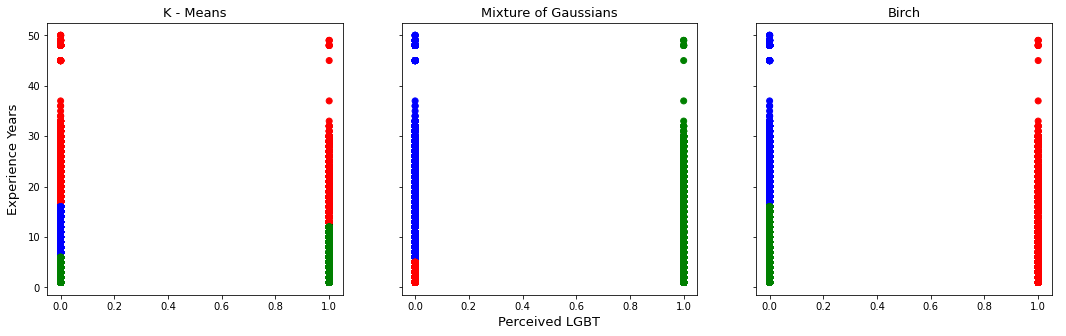

In [15]:
### Perceived LGBT vs. Exp Years (of officer)
results = a.AssignmentFunction(np.array((df.perceived_lgbt, df.exp_years)).T, 3, 2000)
PlotResults(np.array((df.perceived_lgbt, df.exp_years)),results, xaxis = "Perceived LGBT", yaxis =  "Experience Years")

## Results

In [13]:
cols = np.array((df1.perceived_gender, df1.stopduration)).T

## 3 Clusters

Fitting Kmeans
Converged!
Fitting MOG
Fitting Birch


/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_birch.py:649: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (3). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


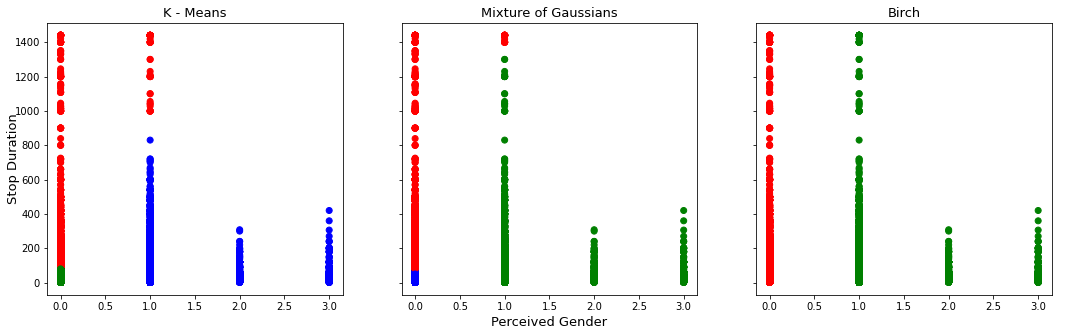

In [14]:
results = a.AssignmentFunction(cols, 3, 2000)
PlotResults(cols.T,results, xaxis = "Perceived Gender", yaxis =  "Stop Duration")


## 4 Clusters

In [ ]:
results = a.AssignmentFunction(cols, 4, 20)
PlotResults(cols.T,results, xaxis = "Perceived Gender", yaxis =  "Stop Duration")


## 5 Clusters

Fitting Kmeans
Converged!
Fitting MOG
Fitting Birch


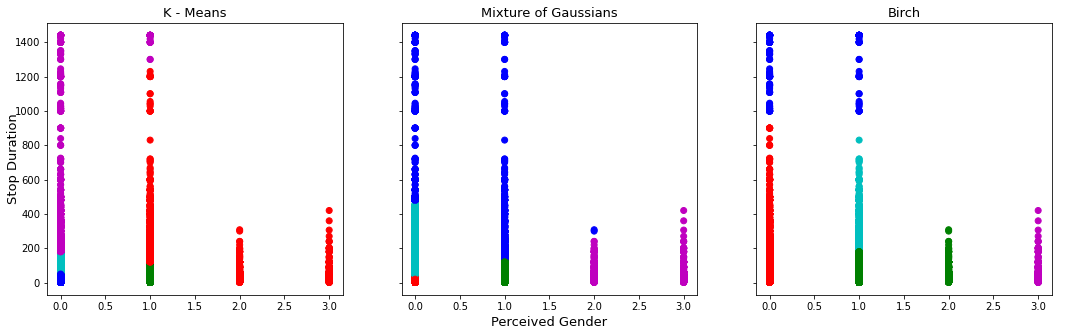

In [17]:
results = a.AssignmentFunction(np.array(((df1.perceived_gender), df1.stopduration)).T, 5, 2000)
PlotResults(np.array((df1.perceived_gender, df1.stopduration)),results, xaxis = "Perceived Gender", yaxis =  "Stop Duration")


## 7 Clusters

Fitting Kmeans
Converged!
Fitting MOG
Fitting Birch


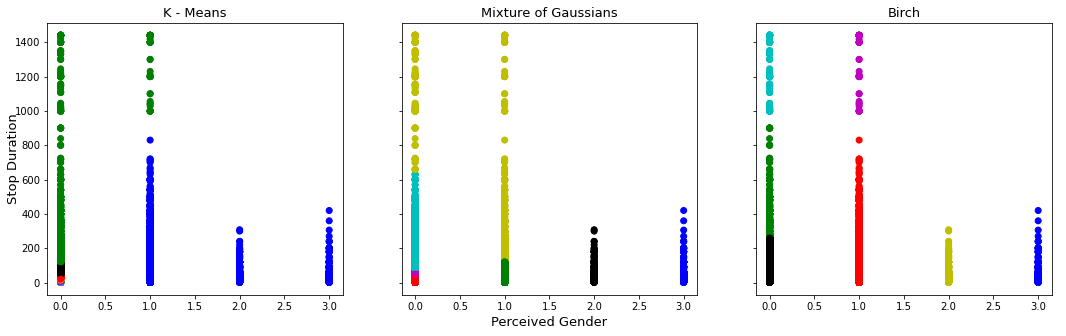

In [18]:
results = a.AssignmentFunction(np.array(((df1.perceived_gender), df1.stopduration)).T, 7, 2000)
PlotResults(np.array((df1.perceived_gender, df1.stopduration)),results, xaxis = "Perceived Gender", yaxis =  "Stop Duration")
